# Project Data Visualization

* Nhóm thực hiện: 4
* Thành viên:
    * Đinh Anh Huy - 18110103.
    * Nguyễn Đức Vũ Duy - 18110004.
* Đề tài số 7 - Bộ dữ liệu: 7_Daegu_Real_Estate_data.csv

In [1]:
# Khai báo các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Khai báo các thư viện dùng cho interactive visualization
# Khai báo thư viện bokeh
from bokeh.plotting import figure, show, output_file
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
output_notebook()

# Khai báo thư viện plotly
# Standard plotly imports
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Khai báo thư viện altair
import altair as alt

Loading BokehJS ...

## Load data
Load data từ file `7_Daegu_Real_Estate_data.csv`.

In [2]:
data = pd.read_csv('7_Daegu_Real_Estate_data.csv')
data.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


## Những thông tin cơ bản của dữ liệu
### Mô tả dữ liệu
**Nội dung**

Đây là dữ liệu giao dịch các căn hộ được tạo từ tháng 8/2007 đến tháng 8/2017 tại Daebong strict, thành phố Daegu, Hàn Quốc.

**Thông tin về các feature trong dữ liệu**
* `SalePrice`: Giá giao dịch tính bằng đơn vị US dollar (target feature).
* `YearBuilt`: Năm xây dựng.
* `YrSold`: Năm giao dịch.
* `MonthSold`: Tháng giao dịch.
* `Size(sqf)`: Kích thước của căn hộ tính bằng đơn vị square feet.
* `Floor`: Số tầng của căn hộ.
* `HallwayType`: Loại phòng trước.
* `HeatingType`: Loại lò sưởi.
* `AptManageType`: Loại hình thức quản lý của căn hộ.
* `N_Parkinglot(Ground)`: Số chỗ đỗ xe ở tầng trệt.
* `N_Parkinglot(Basement)`: Số chỗ đỗ xe dưới tầng hầm.
* `TimeToBusStop`: Thời gian di chuyển từ căn hộ đến trạm xe buýt (categorical).
* `TimeToSubway`: Thời gian di chuyển từ căn hộ đến ga tàu điện ngầm (categorical).
* `N_APT`: Số căn hộ trong khu chung cư.
* `N_manager`: Số người quản lý các tiện ích tại căn hộ (ví dụ như an ninh, vệ sinh,...).
* `N_elevators`: Tổng số thang máy trong một khu chung cư.
* `SubwayStation`: Tên của ga tàu điện ngầm gần căn hộ.
* `N_FacilitiesNearBy(PublicOffice)`: Số lượng văn phòng công cộng gần căn hộ.
* `N_FacilitiesNearBy(Hospital)`: Số lượng bệnh viện gần căn hộ.
* `N_FacilitiesNearBy(Dpartmentstore)`: Số lượng cửa hàng bách hoá gần căn hộ.
* `N_FacilitiesNearBy(Mall)`: Số lượng trung tâm mua sắm gần căn hộ.
* `N_FacilitiesNearBy(ETC)`: Số lượng khách sạn, trường học đặc biệt gần căn hộ.
* `N_FacilitiesNearBy(Park)`: Số lượng công viên gần căn hộ.
* `N_SchoolNearBy(Elementary)`: Số lượng trường tiểu học gần căn hộ.
* `N_SchoolNearBy(Middle)`: Số lượng trường trung học cơ sở gần căn hộ.
* `N_SchoolNearBy(High)`: Số lượng trường trung học phổ thông gần căn hộ.
* `N_SchoolNearBy(University)`: Số lượng trường đại học gần căn hộ
* `N_FacilitiesInApt`: Số lượng tiện ích cho người ở chung cư (ví dụ như hồ bơi, phòng gym, sân chơi ngoài trời,...).
* `N_FacilitiesNearBy(Total)`: Tổng số tiện ích gần căn hộ.
* `N_SchoolNearBy(Total)`: Tổng số trường học gần căn hộ.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

Dữ liệu gồm có 30 cột tương ứng với 30 features được mô tả ở trên và 5901 dòng.

In [4]:
data.dtypes.value_counts()

float64    16
int64       8
object      6
dtype: int64

Trong dữ liệu đầu vào có 24 numerical features và 6 object features.

In [5]:
# In ra mô tả của numeric features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,5891.0,221218.112545,106384.186446,32743.0,144247.0,207964.0,291150.0,585840.0
YearBuilt,5891.0,2002.967408,8.811782,1978.0,1993.0,2006.0,2008.0,2015.0
YrSold,5891.0,2012.691563,2.905488,2007.0,2010.0,2013.0,2015.0,2017.0
MonthSold,5891.0,6.160244,3.387752,1.0,3.0,6.0,9.0,12.0
Size(sqf),5891.0,955.569173,382.464050,135.0,644.0,910.0,1149.0,2337.0
Floor,5891.0,12.026311,7.548743,1.0,6.0,11.0,17.0,43.0
N_Parkinglot(Ground),5891.0,195.883551,218.597210,0.0,11.0,100.0,249.0,713.0
N_Parkinglot(Basement),5891.0,570.761670,408.621075,0.0,184.0,536.0,798.0,1321.0
N_APT,5891.0,5.613648,2.811831,1.0,3.0,7.0,8.0,13.0
N_manager,5891.0,6.310304,3.174088,1.0,5.0,6.0,8.0,14.0


In [6]:
# In ra mô tả của catagory features
data.describe(include='O').T

,count,unique,top,freq
HallwayType,5891,3,terraced,3564
HeatingType,5891,2,individual_heating,5591
AptManageType,5891,2,management_in_trust,5542
TimeToBusStop,5891,3,0~5min,4509
TimeToSubway,5891,5,0-5min,2759
SubwayStation,5891,8,Kyungbuk_uni_hospital,1644


In [7]:
# Thống kê missing values có trong dữ liệu
missing_values = data.isnull().sum()
percentage_missing_values = (missing_values/len(data))*100
missing_values = pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])
missing_values

,Missing values,% Missing
SalePrice,0,0.0
YearBuilt,0,0.0
YrSold,0,0.0
MonthSold,0,0.0
Size(sqf),0,0.0
Floor,0,0.0
HallwayType,0,0.0
HeatingType,0,0.0
AptManageType,0,0.0
N_Parkinglot(Ground),0,0.0


Không có bất kỳ missing value nào trong dữ liệu đầu vào.

## Phân tích và chọn ra các feature quan trọng của dữ liệu cần trực quan
Ta chọn ra các feature quan trọng: 
`SalePrice`, `YearBuilt`, `YrSold`, `Size(sqf)`, `TimeToBusStop`, `TimeToSubway`, `N_FacilitiesInApt`.

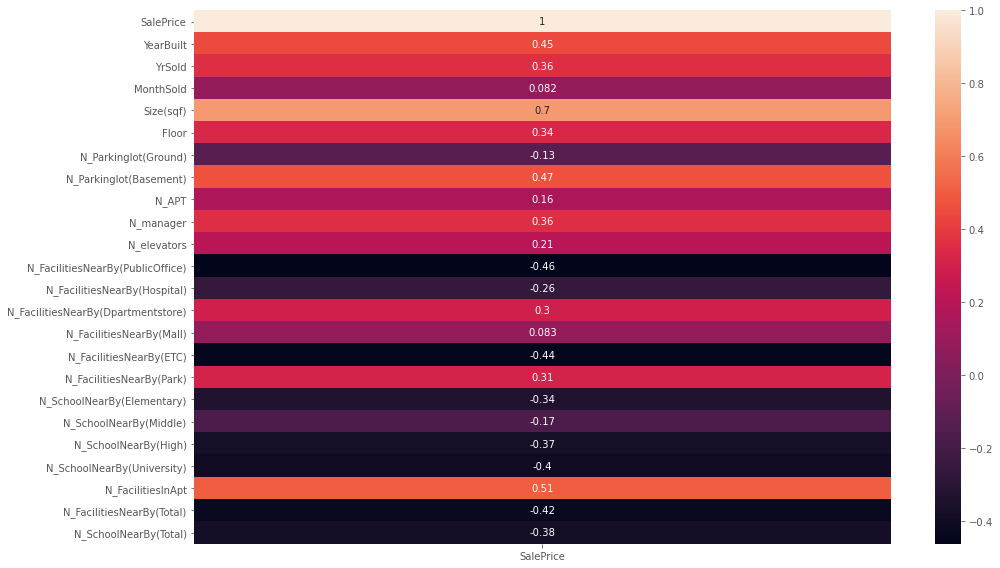

In [8]:
# Heatmap biểu diễn sự tương quan giữa các numerical features với target feature
fig = plt.figure(figsize=(15,8))
corr = data.corr().filter(items = ['SalePrice'])
sns.heatmap(corr, annot=True)
fig.tight_layout()
plt.show()

Ta có thể thấy các features `Size(sqf)`, `YearBuilt`, `YrSold`, `N_FacilitiesInApt` mà ta đã chọn ở trên có hệ số tương quan với target feature khá cao.

## Các biểu đồ biểu diễn các feature quan trọng

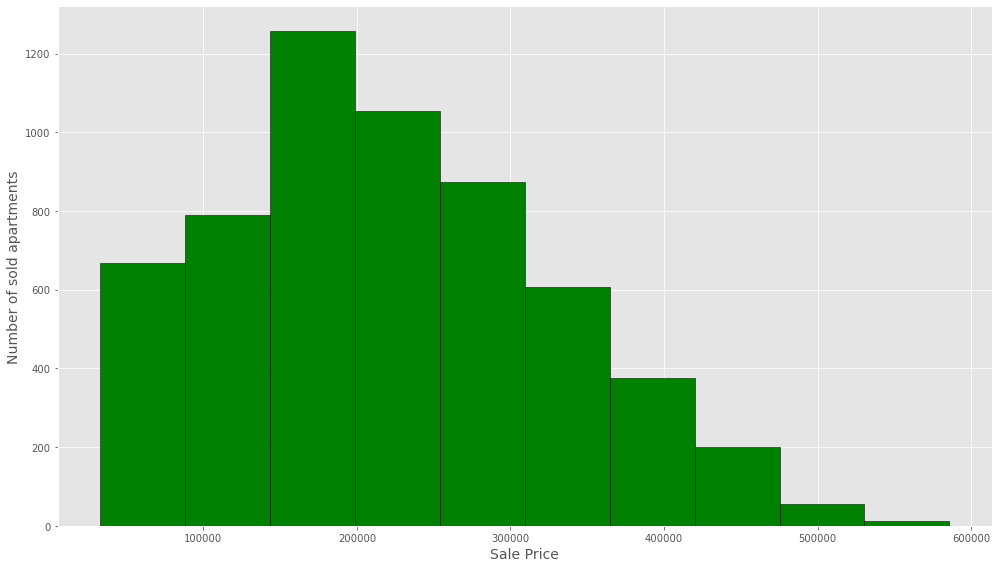

In [9]:
fig = plt.figure(figsize=(14,8))
plt.hist(data['SalePrice'], edgecolor='k', facecolor='green')
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Number of sold apartments', fontsize = 14)
fig.tight_layout()
plt.show()

* Ta thấy đồ thị có dạng gần với phân phối chuẩn và bị lệnh phải. 
* Đa số các căn hộ được bán với giá trong khoảng từ 150000 - 200000 (US dollar). 
* Các căn hộ có giá bán từ 200000 US dollar trở thì bán được càng ít.

### Thống kê số lượng căn hộ giao dịch tính theo năm xây dựng.

In [10]:
NoSoldApt_YearBuilt = data.groupby(['YearBuilt'])[['SalePrice']].count()\
                         .reset_index().rename(columns={'SalePrice': 'Number of Apt'})
NoSoldApt_YearBuilt.head(15)

,YearBuilt,Number of Apt
0,1978,65
1,1980,4
2,1985,65
3,1986,378
4,1992,469
5,1993,674
6,1997,106
7,2003,9
8,2005,737
9,2006,665


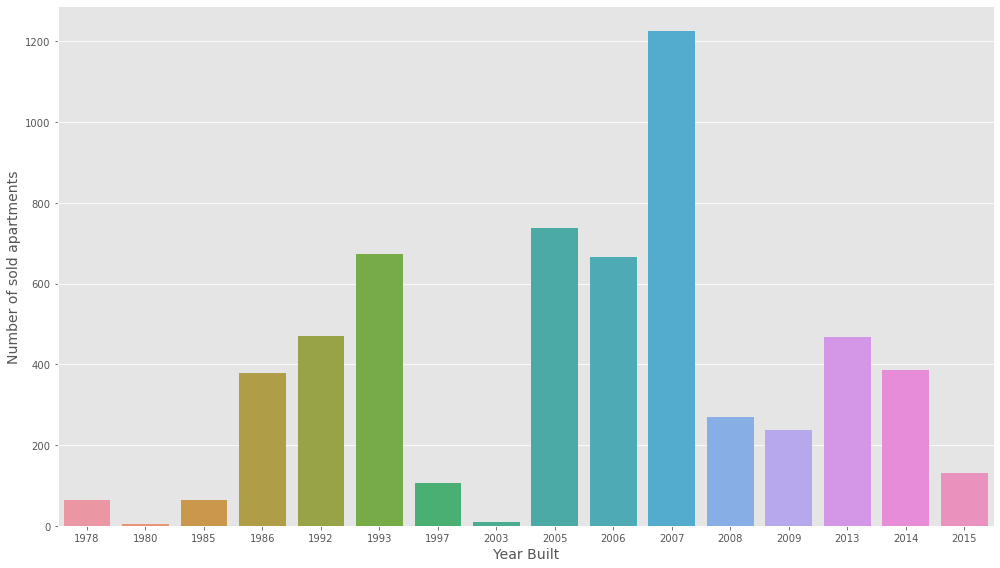

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot('YearBuilt', data=data, ax=ax)
plt.xlabel('Year Built', fontsize = 14)
plt.ylabel('Number of sold apartments', fontsize = 14)
plt.tight_layout()
plt.show()

Từ đồ thị, ta thấy 
* Số lượng căn hộ bán ra được xây dựng trong giai đoạn từ 1978 - 1985 rất ít, đặc biệt chỉ có 4 căn hộ được bán ra xây dựng trong năm 1980.
* Số lượng căn hộ bán ra được xây dựng trong giai đoạn từ 1997 - 2003 rất ít, đặc biệt chỉ có 9 căn hộ được bán ra xây dựng trong năm 2003.
* Số lượng các căn hộ bán ra được xây dựng từ năm 2005 trở đi tăng đột ngột, trong đó các căn hộ được xây dựng vào năm 2007 được bán ra nhiều nhất với số lượng 1225 căn hộ. Những căn hộ này có độ an toàn cao, nằm ở gần các tiện ích cộng cộng - vị trí thuận tiện cho các nhu cầu thiết yếu của người dân nên những căn hộ này sẽ được ưu tiên chọn mua nhiều nhất.

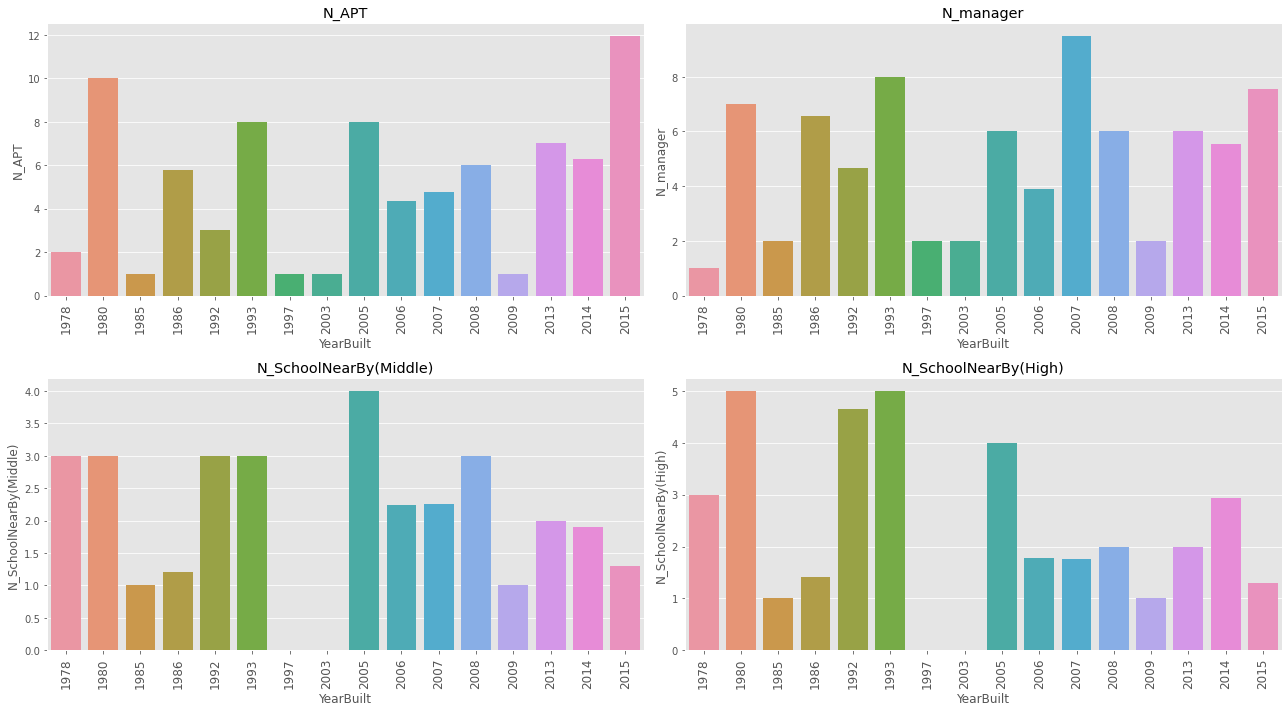

In [12]:
columns = ['N_APT', 'N_manager', 'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)']
f, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(18,10))
for i, c in zip(ax.flatten(), columns):
    if c != 'YearBuilt':
        temp_data = data.groupby(['YearBuilt'])[[c]].mean().reset_index()
        sns.barplot(x="YearBuilt", y=c, data=temp_data, ci=None, ax=i)
        i.tick_params(axis='x', labelrotation = 90, labelsize = 12)
        i.title.set_text(c)
f.tight_layout()
plt.show()

Lý giải cho việc số lượng các căn hộ giao dịch được xây dựng trong giai đoạn 1997 - 2003 rất ít là các căn hộ này hầu như không gần các trường cấp 2, cấp 3, khả năng quản lý kém (số lượng người làm an ninh, vệ sinh,... ít) và xung quanh chỉ có 1 căn hộ láng giềng. Do đó ta có thể kết luận rằng tính an toàn của những căn hộ này khá thấp nên khả năng được chọn mua rất thấp.

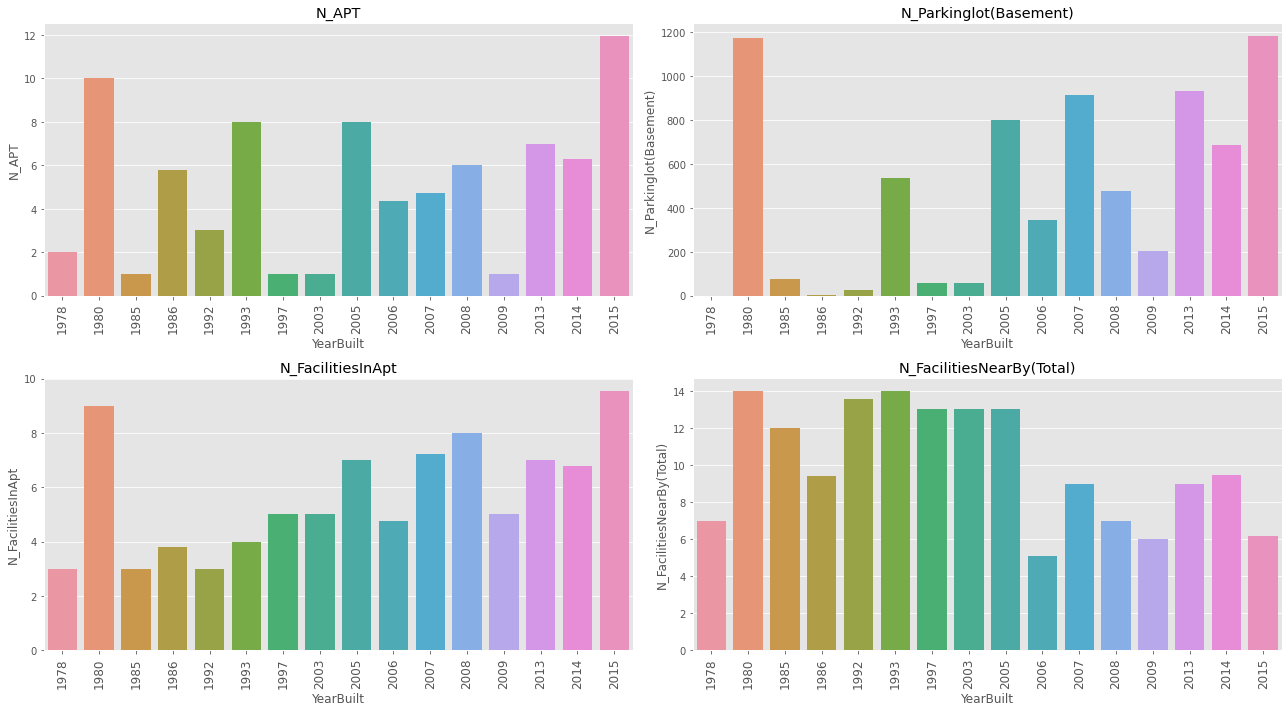

In [13]:
columns = ['N_APT', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)']
f, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(18,10))
for i, c in zip(ax.flatten(), columns):
    if c != 'YearBuilt':
        temp_data = data.groupby(['YearBuilt'])[[c]].mean().reset_index()
        sns.barplot(x="YearBuilt", y=c, data=temp_data, ci=None, ax=i)
        i.tick_params(axis='x', labelrotation = 90, labelsize = 12)
        i.title.set_text(c)
f.tight_layout()
plt.show()

Điều đặc biệt ở các căn hộ giao dịch được xây dựng vào năm 1980 là số lượng giao dịch đặc biệt thấp. Tuy nhiên, theo những đồ thị trên thì những căn hộ này có rất nhiều làng giềng, số lượng chỗ để xe ở tầng hầm nhiều, có nhiều tiện ích ở cả trong lẫn ngoài căn hộ. Điều này có thể suy ra được, những căn hộ giao dịch được xây dựng trong năm 1980 là những căn hộ cũ có chất lượng tốt và giá rẻ nhưng lại hiếm.

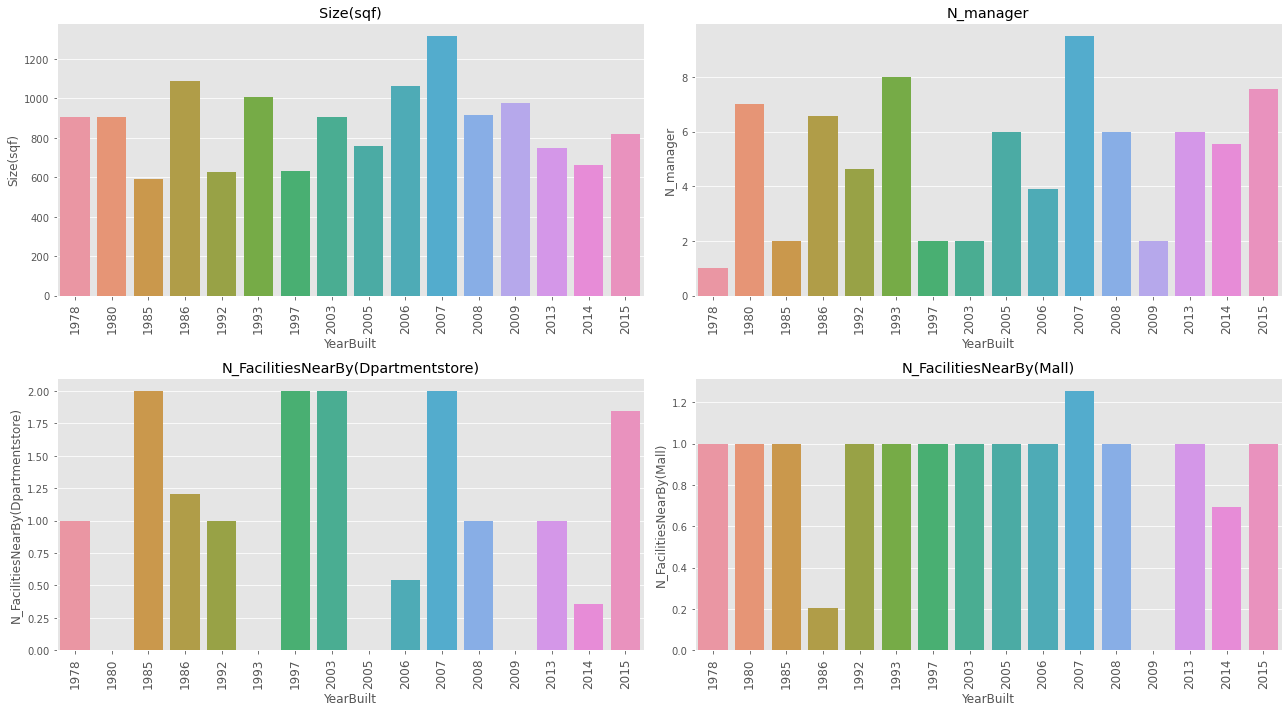

In [14]:
columns = ['Size(sqf)', 'N_manager', 'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)']
f, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(18,10))
for i, c in zip(ax.flatten(), columns):
    if c != 'YearBuilt':
        temp_data = data.groupby(['YearBuilt'])[[c]].mean().reset_index()
        sns.barplot(x="YearBuilt", y=c, data=temp_data, ci=None, ax=i)
        i.tick_params(axis='x', labelrotation = 90, labelsize = 12)
        i.title.set_text(c)
f.tight_layout()
plt.show()

Những căn hộ giao dịch được xây dựng trong năm 2007 đặc biệt có kích thước trung bình lớn nhất (khoảng hơn 1200 square feet), số lượng người quản lý và làm dịch vụ cao (hơn 8 người), vị trí lại gần những trung tâm thương mại, các dịch vụ tiện ích công cộng. Điều này khiến cho số lượng căn hộ xây dựng trong năm này được chú ý và mua lại nhiều nhất.

### Thống kê số lượng căn hộ giao dịch tính theo năm giao dịch.

In [15]:
NoSoldApt_YearSold = data.groupby(['YrSold'])[['SalePrice']].count()\
                            .reset_index().rename(columns={'SalePrice': 'Number of Apt'})
NoSoldApt_YearSold.head(15)

,YrSold,Number of Apt
0,2007,117
1,2008,390
2,2009,537
3,2010,634
4,2011,562
5,2012,456
6,2013,603
7,2014,672
8,2015,568
9,2016,751


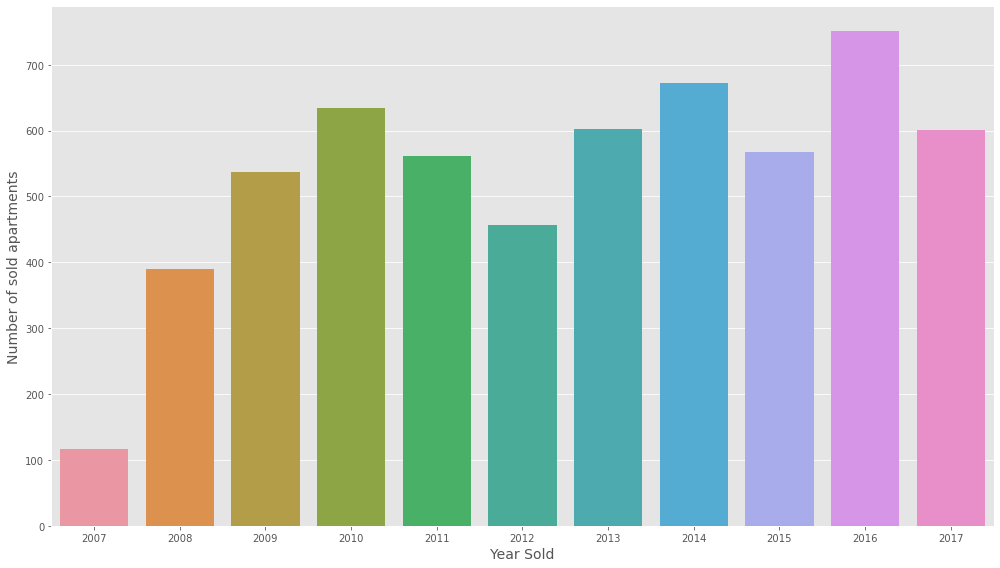

In [16]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot('YrSold', data=data, ax=ax)
plt.xlabel('Year Sold', fontsize = 14)
plt.ylabel('Number of sold apartments', fontsize = 14)
plt.tight_layout()
plt.show()

Từ đồ thị, ta thấy
* Năm 2007, số lượng căn hộ được bán rất thấp chỉ 117 căn hộ. Lý do vì dữ liệu bắt đầu lấy từ tháng 8/2007 nên số lượng căn hộ bán ra ở đây chỉ tính cho 4 tháng cuối của năm 2007.
* Nếu không tính năm 2007 thì năm 2008 sẽ có số lượng căn hộ được bán ra thấp nhất với 390 căn hộ.
* Năm 2016 có số lượng căn hộ bán ra nhiều nhất với 751 căn hộ.

### Thống kê số lượng căn hộ giao dịch theo kích thước.

In [17]:
data_new=data.copy()
data_new['GroupSize']=pd.qcut(data['Size(sqf)'],3)
NoSoldApt_Size = data_new.groupby(['YrSold', 'GroupSize'])[['SalePrice']].count()\
                         .reset_index().rename(columns={'SalePrice': 'Number of Apt'})
NoSoldApt_Size.head(5)

,YrSold,GroupSize,Number of Apt
0,2007,"(134.999, 818.0]",38
1,2007,"(818.0, 914.0]",25
2,2007,"(914.0, 2337.0]",54
3,2008,"(134.999, 818.0]",108
4,2008,"(818.0, 914.0]",88


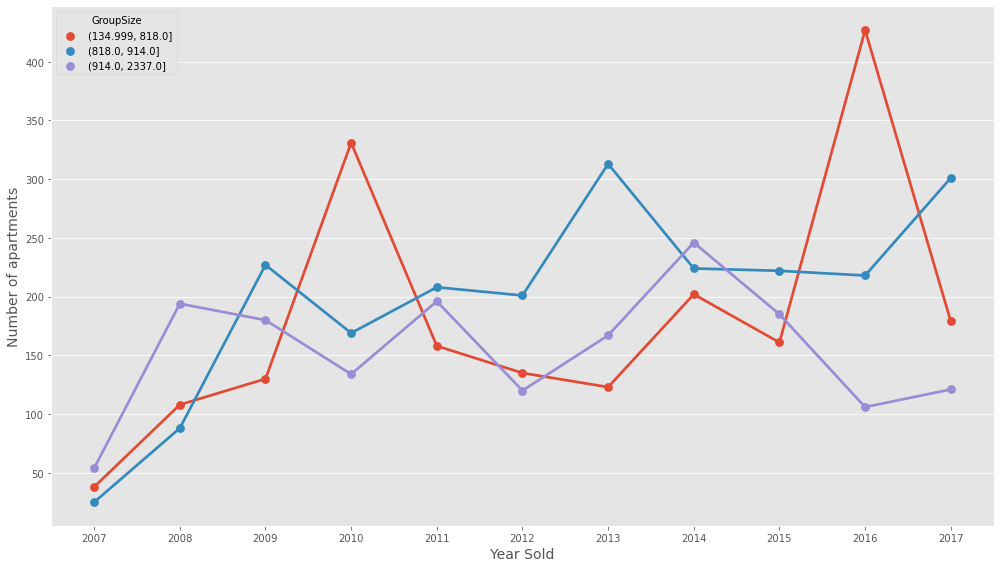

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
sns.pointplot(data=NoSoldApt_Size,x='YrSold',y='Number of Apt',hue='GroupSize',ax=ax)
plt.xlabel('Year Sold', fontsize = 14)
plt.ylabel('Number of apartments', fontsize = 14)
fig.tight_layout()
plt.show()

Từ đồ thị trên, ta thấy rằng
* Nhìn chung ta có thể thấy số giao dịch của mỗi loại kích thước căn hộ đều có biến động, nhưng các căn hộ có kích thước nhỏ lại có số lượng biến động lớn nhất. Số lượng giao dịch cũng tăng đáng kể ở năm 2017 so với 2007, 2008.
* Số lượng giao dịch của các căn hộ có kích thước lớn mặc dù có độ biến động từ 2008 - 2016 nhưng nhìn chung vẫn có số lượng khá thấp so với 2 loại kích thước còn lại. 
* Trong giai đoạn từ 2013 - 2015, số lượng giao dịch của các căn hộ có kích thước nhỏ lại thấp hơn những căn hộ có kích thước lớn. Điều này cho thấy trong giai đoạn này, người dân có xu hướng chọn mua những căn hộ có kích thước trung bình hoặc lớn nhiều hơn.
* Trong khoảng thời gian năm 2009 tới 2010, số lượng căn hộ có kích thước nhỏ được bán ra trong thời gian này tăng đột biến (gấp gần 3 lần) trong khi số lượng căn hộ bán ra có kích thước vừa và lớn lại sụt giảm đáng kể. 
* Chúng ta cũng có xu hướng tương tự vào giai đoạn năm 2015, 2016 khi số lượng căn hộ có kích thước nhỏ bán ra trong thời gian này cũng tăng đột biến (khoảng gấp 3 lần) trong khi số lượng căn hộ có kích thước lớn bán ra lại sụt giảm khoảng 1 nửa trong khi số lượng có kích thước vừa giữ ổn định. 


### Thống kê số lượng căn hộ giao dịch theo thời gian đến các trạm xe buýt.

In [19]:
NoSoldApt_TimeToBusStop = data.groupby(['TimeToBusStop'])[['SalePrice']].count()\
                         .reset_index().rename(columns={'SalePrice': 'Number of Apt'})
NoSoldApt_TimeToBusStop.head(15)

,TimeToBusStop,Number of Apt
0,0~5min,4509
1,10min~15min,55
2,5min~10min,1327


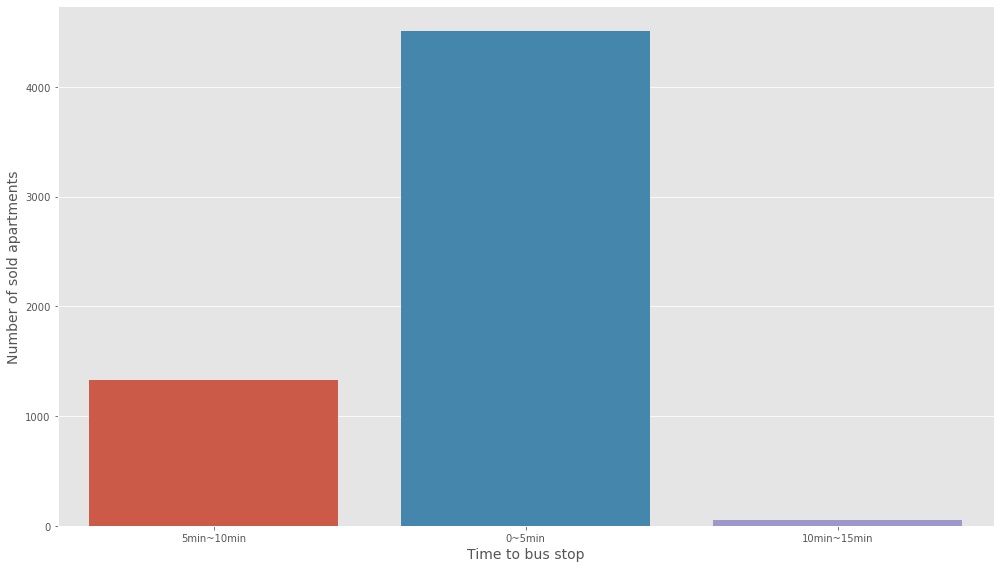

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot('TimeToBusStop', data=data, ax=ax)
plt.xlabel('Time to bus stop', fontsize = 14)
plt.ylabel('Number of sold apartments', fontsize = 14)
plt.tight_layout()
plt.show()

Từ đồ thị trên, ta thấy rằng
* Đa số các căn hộ bán ra đều cách trạm xe buýt từ 0 - 5 phút đi bộ.
* Các căn hộ ở xa trạm xe buýt hơn thường không được lựa chọn để mua nên có số lượng cực thấp. 

Từ 2 điều trên ta có thể suy ra rằng người dân tại thành phố Daegu ưa chuộng những căn hộ gần với trạm xe buýt hơn vì điều đó sẽ khiến họ trở nên thuận tiện trong việc di chuyển.

### Thống kê số lượng căn hộ giao dịch theo thời gian đến các trạm tàu điện ngầm.

In [21]:
NoSoldApt_TimeToSubway = data.groupby(['TimeToSubway'])[['SalePrice']].count()\
                         .reset_index().rename(columns={'SalePrice': 'Number of Apt'})
NoSoldApt_TimeToSubway.head(15)

,TimeToSubway,Number of Apt
0,0-5min,2759
1,10min~15min,806
2,15min~20min,953
3,5min~10min,1135
4,no_bus_stop_nearby,238


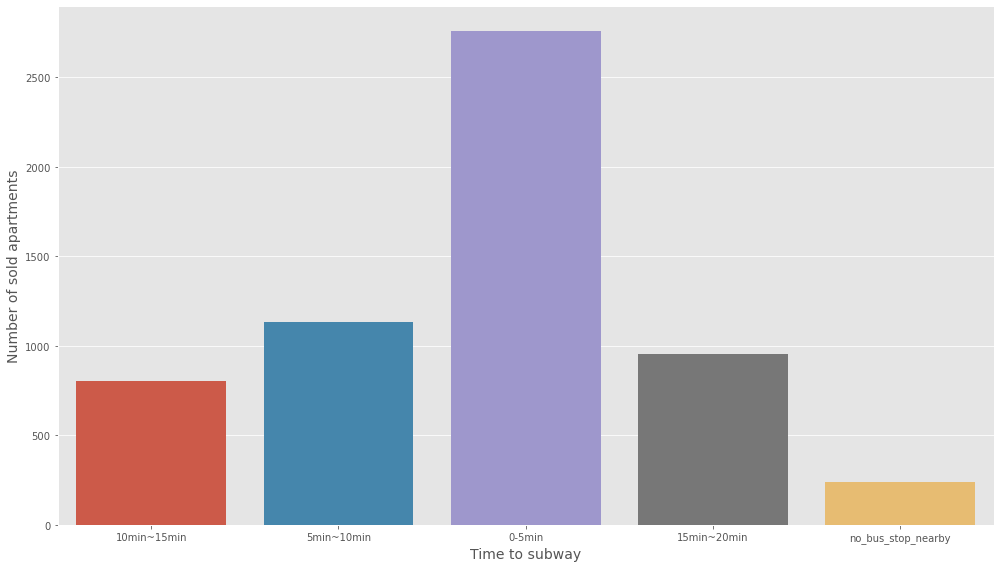

In [22]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot('TimeToSubway', data=data, ax=ax)
plt.xlabel('Time to subway', fontsize = 14)
plt.ylabel('Number of sold apartments', fontsize = 14)
plt.tight_layout()
plt.show()

Từ đồ thị trên, ta có thể thấy
* Đa số các căn hộ cách trạm tàu điện ngầm từ 0 - 5 phút đi bộ được chọn mua nhiều nhất.
* Các căn hộ không gần với trạm xe nào được chọn mua ít nhất.

Những điều này cho thấy rằng dân cư ở thành phố Daegu ưu tiên lựa chọn những căn hộ gần các trạm tàu điện ngầm để thuận tiện cho việc di chuyển của họ. Những căn hộ không gần các trạm xe là lựa chọn cuối cùng của họ nếu không tìm được những căn hộ tốt hơn nên số lượng căn hộ bán ra rất ít.

## Các biểu đồ biểu diễn mối quan hệ giữa các feature

### Thống kê số lượng và giá bán trung bình của các căn hộ theo từng năm xây dựng.

In [23]:
SalePrice_YearBuilt = data.groupby(['YearBuilt'])[['SalePrice']].mean()
NoSoldApt_YearBuilt = data.groupby(['YearBuilt'])[['SalePrice']].count()
MeanSalePrice_YrBuilt = pd.concat([SalePrice_YearBuilt, NoSoldApt_YearBuilt], axis=1, ignore_index=True)\
                                .reset_index().rename(columns={0: 'MeanSalePrice', 1 : 'NoSoldApt'})
MeanSalePrice_YrBuilt.head(20)

,YearBuilt,MeanSalePrice,NoSoldApt
0,1978,169039.615385,65
1,1980,71681.000000,4
2,1985,78401.092308,65
3,1986,181543.283069,378
4,1992,96215.933902,469
5,1993,160855.087537,674
6,1997,95416.122642,106
7,2003,134021.111111,9
8,2005,166852.907734,737
9,2006,249809.592481,665


In [24]:
source_yb = ColumnDataSource(dict(year=MeanSalePrice_YrBuilt.YearBuilt,\
                                  saleprice=MeanSalePrice_YrBuilt.MeanSalePrice,
                                  number=MeanSalePrice_YrBuilt.NoSoldApt))
TOOLTIPS = [
    ("Year Built:", "@year"),
    ("Mean of Sale Price:", "@saleprice"),
    ("Number of sold apartments:", "@number")
]

fig = figure(title="Mean Sale Price per Year Built",
           x_axis_label='Year Build',
           y_axis_label='Mean of Sale Price',
           plot_height=400, 
           plot_width=900, 
           tooltips=TOOLTIPS)

fig.line(x="year", y="saleprice", source=source_yb, color='#1F78B4', line_width=3)

fig.grid.grid_line_alpha=0.8

show(fig)

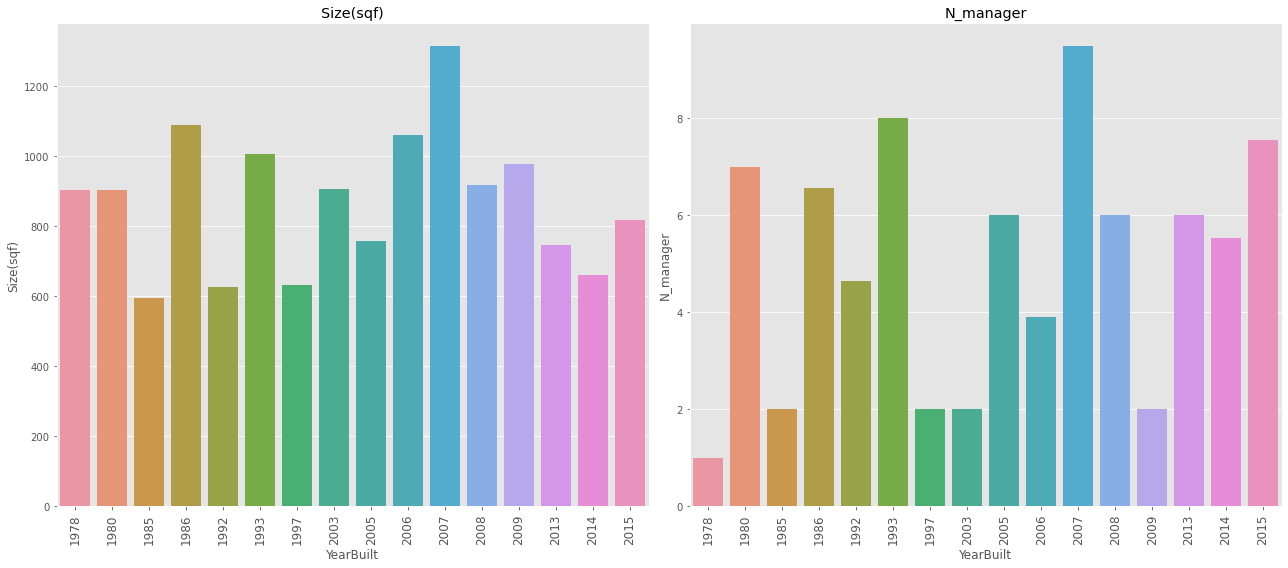

In [25]:
columns = ['Size(sqf)', 'N_manager']
f, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(18,8))
for i, c in zip(ax.flatten(), columns):
    if c != 'YearBuilt':
        temp_data = data.groupby(['YearBuilt'])[[c]].mean().reset_index()
        sns.barplot(x="YearBuilt", y=c, data=temp_data, ci=None, ax=i)
        i.tick_params(axis='x', labelrotation = 90, labelsize = 12)
        i.title.set_text(c)
f.tight_layout()
plt.show()

Từ đồ thị trên, ta thấy rằng
* Trong giai đoạn từ 1978 - 1997, giá giao dịch trung bình của các căn hộ được xây dựng trong giai đoạn này có nhiều biến động. Trong đó năm 1980 có giá giao dịch trung bình thấp nhất, điều này có thể là do số lượng các căn hộ giao dịch được xây dựng trong năm này rất thấp (chỉ 4 căn hộ) và có tuổi thọ cao.
* Giai đoạn sau năm 1997 đến năm 2007, giá giao dịch trung bình của các căn hộ được xây dựng trong giai đoạn này tăng đột biến. Lý giải cho việc này là những căn hộ giao dịch được xây dựng trong giai đoạn này có xu hướng tăng về kích thước và số lượng người quản lí. 
* Tuy nhiên, các căn hộ được xây dựng từ năm 2007 đến 2013 lại có dấu hiệu giảm. Lý giải cho điều này có thể là do số lượng giao dịch các căn hộ được xây dựng trong giai đoạn này giảm đi và đa số các căn hộ giao dịch đều có kích thước nhỏ và trung bình nên giá giao dịch trung bình của các căn hộ được xây dựng trong giai đoạn này giảm so với trước đó.
* Từ năm 2013 trở đi, giá giao dịch trung bình của các căn hộ được xây dựng trong giai đoạn này bắt đầu tăng trở lại. Lý do vì người dân bắt đầu chọn mua những căn hộ có kích thước trung bình và lớn nhiều hơn, do có kích thước lớn hơn nên giá cũng tăng không ít.

### Thống kê số lượng và giá bán trung bình của các căn hộ theo từng năm bán ra.

In [26]:
SalePrice_YearSold = data.groupby(['YrSold'])[['SalePrice']].mean()
NoSoldApt_YearSold = data.groupby(['YrSold'])[['SalePrice']].count()
MeanSalePrice_YrSold = pd.concat([SalePrice_YearSold, NoSoldApt_YearSold], axis=1, ignore_index=True)\
                                .reset_index().rename(columns={0: 'MeanSalePrice', 1 : 'NoSoldApt'})
MeanSalePrice_YrSold.head(15)

,YrSold,MeanSalePrice,NoSoldApt
0,2007,193989.034188,117
1,2008,201853.058974,390
2,2009,177825.657356,537
3,2010,148217.151420,634
4,2011,194249.209964,562
5,2012,190801.328947,456
6,2013,222325.983416,603
7,2014,239752.703869,672
8,2015,282221.441901,568
9,2016,234509.402130,751


In [27]:
source_ys = ColumnDataSource(dict(year=MeanSalePrice_YrSold.YrSold,\
                                  saleprice=MeanSalePrice_YrSold.MeanSalePrice,
                                  number=MeanSalePrice_YrSold.NoSoldApt))
TOOLTIPS = [
    ("Year Sold:", "@year"),
    ("Mean of Sale Price:", "@saleprice"),
    ("Number of sold apartments:", "@number")
]

fig = figure(title="Mean Sale Price per Year Sold",
           x_axis_label='Year Sold',
           y_axis_label='Mean of Sale Price',
           plot_height=400, 
           plot_width=900, 
           tooltips=TOOLTIPS)

fig.line(x="year", y="saleprice", source=source_ys, color='#1F78B4', line_width=3)

fig.grid.grid_line_alpha=0.8

show(fig)

Từ đồ thị trên, ta thấy rằng
* Nhìn chung, giá giao dịch trung bình của các căn hộ từ năm 2007 - 2017 có xu hướng tăng. 
* Trong năm 2010, giá giao dịch trung bình lại đạt mức thấp nhất trong giai đoạn khảo sát. Lý giải cho điều này là vì số lượng lớn các căn hộ giao dịch trong giai đoạn này đều có kích thước nhỏ, các căn hộ có kích thước vừa và lớn lại chiếm rất ít, điều này cũng có thể giải thích tại sao ở năm 2010 số lượng giao dịch cao hơn những năm lân cận lại có giá giao dịch trung bình thấp.
* Giai đoạn từ 2010 - 2015, giá giao dịch trung bình các căn hộ có xu hướng tăng nhanh. Lý giải cho việc này là sự sụt giảm trong số lượng căn hộ có kích thước nhỏ được bán ra và tăng đối với căn hộ có kích thước vừa và lớn. Hơn nữa, chất lượng nói chung các căn hộ trong giai đoạn này đều cao. 
* Tuy nhiên đến năm 2016, giá giao dịch trung bình lại bị giảm. Lý do cho điều này là số lượng các căn hộ có kích thước nhỏ trong năm này tăng đột biến, khiến cho giá giao dịch trung bình bị ảnh hưởng lớn.

### Thống kê giá giao dịch trung bình theo số lượng tiện ích có trong căn hộ.

In [28]:
SalePrice_Facilities = data.groupby(['N_FacilitiesInApt'])[['SalePrice']].mean()
NoSoldApt_Facilities = data.groupby(['N_FacilitiesInApt'])[['SalePrice']].count()
MeanSalePrice_Facilities = pd.concat([SalePrice_Facilities, NoSoldApt_Facilities], axis=1, ignore_index=True)\
                                .reset_index().rename(columns={0: 'MeanSalePrice', 1 : 'NoSoldApt'})
MeanSalePrice_Facilities.head(10)

,N_FacilitiesInApt,MeanSalePrice,NoSoldApt
0,1,57294.836364,55
1,2,98527.188406,69
2,3,100854.293944,677
3,4,200061.286109,1447
4,5,266346.104310,1160
5,7,186586.816327,1225
6,8,243339.081481,270
7,9,312737.177340,203
8,10,342371.644586,785


In [29]:
selected_bars = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart(MeanSalePrice_Facilities).mark_bar().encode(
    x=alt.X('N_FacilitiesInApt:N', title='Number of facilities in apartment'),
    y=alt.Y('MeanSalePrice:Q', title='Mean of Sale Price'),
    tooltip=['N_FacilitiesInApt', 'MeanSalePrice', 'NoSoldApt'],
    opacity=alt.condition(selected_bars, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).properties(width=500).add_selection(selected_bars).interactive()

line = alt.Chart(MeanSalePrice_Facilities).mark_rule(color='firebrick').encode(
    y=alt.Y('mean(MeanSalePrice):Q', title='Mean of Sale Price'),
    size=alt.SizeValue(3)
).transform_filter(selected_bars)
bars + line

alt.LayerChart(...)

Từ đồ thị trên, ta thấy rằng
* Khi số lượng tiện tích trong chung cư càng nhiều thì giá căn hộ bán ra càng lớn. Cụ thể là ở trên mức trung bình lượng tiền bán của tổng thể.

### Thống kê giá bán trên một đơn vị diện tích (square feet).

In [30]:
data_new = data.copy()
data_new['SalePriceSF'] = data['SalePrice']/data['Size(sqf)']
columns=['SalePrice', 'Size(sqf)', 'SalePriceSF']
salepriceSF_df = data_new[columns]
salepriceSF_df.head()

,SalePrice,Size(sqf),SalePriceSF
0,141592,814,173.945946
1,51327,587,87.439523
2,48672,587,82.916525
3,380530,2056,185.082685
4,221238,1761,125.632027


In [31]:
data_new['SalePriceSF'].iplot(kind='hist', xTitle='Sale Price per square feet (in US dollar)',
                  yTitle='Number of apartments', title='SalePriceSF Distribution')

Từ đồ thị trên, ta thấy rằng
* Đa số người dân lựa chọn mua những căn hộ có giá nằm trong khoảng 220 - 230 dollars trên mỗi square feet, với số lượng giao dịch lên đến 380 căn hộ.
* Đa số người dân có thu nhập trung bình khi các căn hộ giao dịch đa số có giá trong khoảng 180 - 280 dollars trên mỗi square feet.
* Với giá giao dịch trên mỗi square feet trên 230, số lượng giao dịch càng thấp. 

Từ những điều trên, ta có thể kết luận rằng, đa số người dân ở phường Daebong có mức thu nhập trung bình, những người dân có thu nhập cao vẫn có những chiểm tỉ lệ không cao.

### Thống kê giá giao dịch trên từng square feet theo tuổi thọ căn hộ.

In [32]:
data_new['ConstructionAge'] = data['YrSold'] - data['YearBuilt']
columns=['SalePriceSF', 'ConstructionAge']
Saleprice_consAge_df = data_new[columns]
Saleprice_consAge_df.head()

,SalePriceSF,ConstructionAge
0,173.945946,1
1,87.439523,22
2,82.916525,22
3,185.082685,1
4,125.632027,14


In [33]:
Saleprice_consAge_df.iplot(
    x='ConstructionAge',
    y='SalePriceSF',
    mode='markers',
    xTitle='Construction Age of apartment',
    yTitle='Price per square feet (in dollars)')

Từ đồ thị trên, ta thấy rằng có 2 nhóm khách hàng chính:
* Một nhóm người chọn mua những căn hộ có tuổi thọ thấp và giá trên mỗi square feet cao
* Nhóm còn lại chọn các căn hộ có tuổi thọ cao hoặc trung bình và giá trên mỗi square feet thấp.

In [34]:
sorted_yearsold=data_new.sort_values(by='YrSold', ascending=True)
fig = px.scatter(sorted_yearsold, x = 'Size(sqf)', y = 'SalePrice', animation_frame = 'YrSold')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig

Từ đồ thị trên, ta thầy rằng
* Số lượng giao dịch ngày càng dày đặc theo thời gian.
* Số lượng giao dịch các căn hộ có kích thước lớn hơn 1000 square feet ngày càng nhiều.
* Giá thành các căn hộ giao dịch cũng tăng dần theo thời gian.

Điều này cho thấy rằng mức sống của người dân tại phường Daebong ngày càng được cải thiện do số lượng các căn hộ có kích thước lớn hơn 1000 square feet ngày càng tăng. Nhìn chung, giá tiền các căn hộ được bán ra có xu hướng tăng lên theo thời gian. Điều đó chứng tỏ cuộc sống ngày càng đắt đỏ hơn.

In [35]:
data_new.iplot(
    x='ConstructionAge',
    y='SalePriceSF',
    categories='TimeToBusStop',
    xTitle='Construction Age of apartment',
    yTitle='Price per square feet (in dollars)')

Từ đồ thị trên, ta thấy rằng
* Đa số các căn hộ giao dịch được chọn đều là các căn hộ gần trạm xe buýt (cách trạm từ 0 - 5 phút di chuyển).
* Phần lớn các căn hộ giao dịch gần trạm xe buýt hoặc có tuổi thọ thấp và giá trên mỗi square feet cao, hoặc có tuổi thọ cao và giá trên mỗi square cao thấp.
* Các căn hộ cách xa trạm xe buýt thường là những căn hộ có tuổi thọ thấp và giá khá cao.
* Các căn hộ được giao dịch có tuổi thọ cao đều rất gần với các trạm xe buýt.

Điều này cho thấy rằng, người dân ở phường Daebong luôn ưu tiên cho việc chọn nơi ở thuận tiện cho việc di chuyển của mình bằng phương tiện công cộng là xe buýt, ta thấy được điều này thông qua việc mặc dù những căn hộ gần trạm xe buýt có giá trên mỗi square feet cao hoặc tuổi thọ cao nhưng vẫn có số lượng căn hộ được mua vẫn chiếm đa số. Ta cũng có thể thấy nhịp sống tại đây khá tất bật khi cần phải chọn những nơi gần trạm dừng để có thể tiết kiệm thời gian.

In [36]:
data_new.iplot(
    x='ConstructionAge',
    y='SalePriceSF',
    categories='TimeToSubway',
    xTitle='Construction Age of apartment',
    yTitle='Price per square feet (in dollars)')

Từ đồ thị trên, ta thấy rằng
* Đa số các căn hộ giao dịch được chọn đều là các căn hộ gần trạm tàu điện ngầm.
* Các căn hộ cách khá xa trạm tàu điện ngầm đa số tập trung vào những căn hộ có tuổi thọ trung bình (từ 10 - 25 năm).
* Các căn hộ không gần trạm dừng nào đa số đều là những căn hộ có tuổi thọ thấp (chỉ từ 0 - 8 năm).
* Các căn hộ gần với trạm tàu điện ngầm (cách 0 - 10 phút di chuyển) đều tập trung ở khu vực căn hộ có tuổi thọ thấp nhưng giá trên mỗi square feet cao hoặc tuổi thọ cao nhưng giá trên mỗi square feet thấp.
* Các căn hộ có tuổi thọ khá cao (từ 12 - 25 năm) mà cách trạm tàu điện ngầm 15 - 20 phút di chuyển thường có giá thành trên mỗi square feet thấp.

Những điều trên cho thấy rằng người dân vẫn ưu tiên chọn những căn hộ gần với trạm tàu điện ngầm hơn để thuận tiện cho việc di chuyển. Lý giải điều này thông qua việc ta có thế thấy rằng những căn hộ gần trạm dừng (cách khoảng 0 - 5 phút) đa số đều trẻ nên giá thành khá cao hoặc tuổi thọ rất cao (29 - 39 năm) những vẫn được mua với số lượng lớn. Những căn hộ cách khá xa trạm tàu điện ngầm (khoảng từ 15 - 20 phút) được chọn mua đa số là những căn hộ có giá thành thấp hoặc trung bình. Và những căn hộ không gần bất kỳ trạm dừng nào, đều là những căn hộ trẻ.